## Домашнее задание к уроку №7

In [61]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [58]:
"""
Уравнение линейной регрессии
y = a + b * x
"""
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# По формуле
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
a = ks.mean() - b * zp.mean()
print(f"ks = {round(a, 2)} + {round(b, 2)} * zp")

# Матричный способ
ks = ks[:, np.newaxis]
zp = zp[:, np.newaxis]
zp = np.hstack((np.ones((len(zp), 1)), zp))

b = (np.linalg.inv(zp.T @ zp) @ zp.T @ ks).squeeze()
print(f"ks = {round(b[0], 2)} + {round(b[1], 2)} * zp")

ks = 444.18 + 2.62 * zp
ks = 444.18 + 2.62 * zp


In [59]:
"""
Уравнение линейной регрессии
y = b * x
"""
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape(-1, 1)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]).reshape(-1, 1)

b = (np.linalg.inv(zp.T @ zp) @ zp.T @ ks).squeeze(1)

print(f"ks = {round(b[0], 2)} * zp")

ks = 5.89 * zp


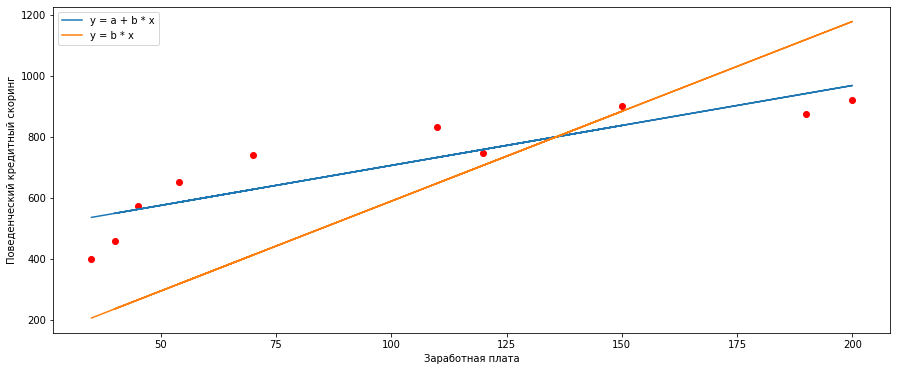

In [65]:
plt.figure(figsize=(15, 6))
plt.scatter(zp, ks, c='red')
plt.plot(zp, 444.18 + 2.62 * zp)
plt.plot(zp, 5.89 * zp)
plt.xlabel('Заработная плата')
plt.ylabel('Поведенческий кредитный скоринг')
plt.legend(['y = a + b * x', 'y = b * x'])
plt.show()

### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [89]:
"""
Уравнение линейной регрессии
y = b1 * x
"""
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

# Функция потерь - MSE
def mse(b1, x, y, n):
    return np.sum((b1 * x - y) ** 2) / n
# Производная функции потерь по b1: 2 * np.sum(x * (b1 * x - y)) / n

# learning rate
lr = 1e-6

# инициализация веса случайным образом
b1 = np.random.uniform(-3, 3)

# количество эпох (итераций)
epochs = 500

for epoch in range(epochs + 1):
    b1 -= lr * 2 / n * np.sum(zp * (b1 * zp - ks))
    if epoch % 100 == 0:
        print(f"Iteration: {epoch}, b1: {b1}, loss_mse: {mse(b1, zp, ks, n)}")

print(f"\nks = {round(b1, 2)} * zp")

Iteration: 0, b1: -2.0700119147185747, loss_mse: 929387.5044604475
Iteration: 100, b1: 5.402865145879012, loss_mse: 59783.64074034785
Iteration: 200, b1: 5.86003016461622, loss_mse: 56529.08458783879
Iteration: 300, b1: 5.8879979543526515, loss_mse: 56516.90417306406
Iteration: 400, b1: 5.889708927919485, loss_mse: 56516.85858696963
Iteration: 500, b1: 5.889813599421024, loss_mse: 56516.858416360315

ks = 5.89 * zp


При матричном расчете получили ks = 5.89 * zp

Функция потерь сошлась

### Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)

In [109]:
"""
Уравнение линейной регрессии
y = b0 + b1 * x
"""
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

# Функция потерь - MSE
def mse(b0, b1, x, y, n):
    return np.sum((b0 + b1 * x - y) ** 2) / n
# Производная функции потерь по b0: 2 * np.sum(b0 + b1 * x - y) / n
# Производная функции потерь по b1: 2 * np.sum(x * (b0 + b1 * x - y)) / n

# learning rate
lr = 1e-5

# инициализация веса случайным образом
b0 = np.random.uniform(-3, 3)
b1 = np.random.uniform(-3, 3)

# количество эпох (итераций)
epochs = 2000000

for epoch in range(epochs + 1):
    b0 -= lr * 2 * np.sum(b0 + b1 * zp - ks) / n
    b1 -= lr * 2 * np.sum(zp * (b0 + b1 * zp - ks)) / n
    if epoch % 500000 == 0:
        print(f"Iteration: {epoch}, b0: {b0}, b1: {b1}, loss_mse: {mse(b0, b1, zp, ks, n)}")

print(f"\nks = {round(b0, 2)} + {round(b1, 2)} * zp")

Iteration: 0, b0: -2.3989155923341454, b1: 2.720894478349299, loss_mse: 196950.75765675656
Iteration: 500000, b0: 408.83784353497055, b1: 2.880652008874362, loss_mse: 6787.211547467648
Iteration: 1000000, b0: 441.3806417240271, b1: 2.6411238412957996, loss_mse: 6472.39827124206
Iteration: 1500000, b0: 443.95602948731926, b1: 2.6221679448740507, loss_mse: 6470.426627208853
Iteration: 2000000, b0: 444.15984177453214, b1: 2.620667803939565, loss_mse: 6470.41427899965

ks = 444.16 + 2.62 * zp


При матричном расчете получили ks = 444.18 + 2.62 * zp

Функция потерь сошлась